# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


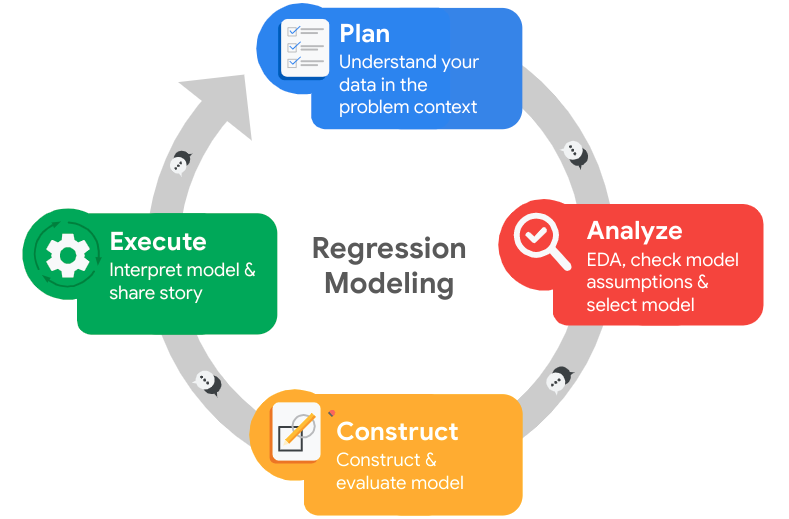

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders for this project are HR division of the company. I am trying to understand what contribute to employees leaving the company and build a machine learning model that would predict whether or not an employee will leave the company. I think other features might be created in order to build a model. E.g. "salary_to_working_hours" - exploring if sb that worked a lot but was not paid in accordance with their work. At this stage, it is one of the possible features that might be included. I will do EDA and data cleaning if necessary and then will consider other features to add. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages"
#Modules for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Function for displaying all of the columns in a dataframe.
pd.set_option('display.max_columns', None)
#Modules for building a machine learning model. At this stage I import anything that might be
#useful at building model stage. However, I might not use all of them for I will pick up one 
#of the models to build.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Metrics and other useful modules.
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree
#For model saving
import pickle



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'Work_accident':'work_accident',
                           'Department':'department',
                           'time_spend_company':'tenure',
                           'average_montly_hours':'average_monthly_hours'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
missing_values = df0.isna().sum()
print(missing_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicate_rows = df0.duplicated()
print(duplicate_rows)
print(f'Number of duplicate rows: {duplicate_rows.sum()}')

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool
Number of duplicate rows: 3008


In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

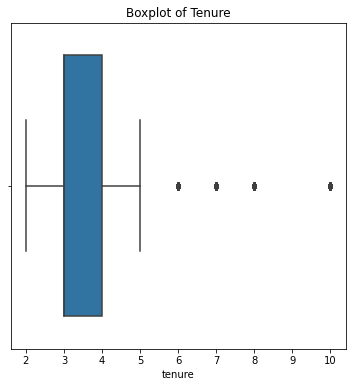

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
sns.boxplot(x='tenure', data=df1)
plt.title('Boxplot of Tenure')
plt.show()



In [12]:
# Determine the number of rows containing outliers
# Calculate the interquartile range (IQR)
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = (df1['tenure'] < (Q1 - 1.5 * IQR)) | (df1['tenure'] > (Q3 + 1.5 * IQR))
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)
num_rows_with_outliers = outliers.sum()
print(f'Number of rows with outliers: {num_rows_with_outliers}')



Lower limit: 1.5
Upper limit: 5.5
Number of rows with outliers: 824


Certain types of models are more sensitive to outliers than others. When I get to the stage of building my model, I mightconsider whether to remove outliers, based on the type of model I decide to use.

# Pace: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Data seems to be more or less evenly distributed with not so many outliers. There were some duplicate rows which I removed from dataset. Duplicate rows would distort the results at later stages. I also renamed some columns since they were either to long or contained some spelling errors. I did to make it easier to work with dataset. I do not have any ethical considerations at this stage.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
left = df1[df1['left'] == 1].shape[0]
stayed = df1[df1['left'] ==0].shape[0]
print(f'Number of people left: {left}')
print(f'Number of people stayed: {stayed}')
# Get percentages of people who left vs. stayed
percentage_left = round(left/(left+stayed)*100,2)
percentage_stayed = round(stayed/(left+stayed)*100,2)
print(f'Percentage of people stayed: {percentage_stayed}%')
print(f'Percentage of people left: {percentage_left}%')


Number of people left: 1991
Number of people stayed: 10000
Percentage of people stayed: 83.4%
Percentage of people left: 16.6%


### Data visualizations

Now, I am going to examine variables that I am interested in, and create plots to visualize relationships between variables in the data.

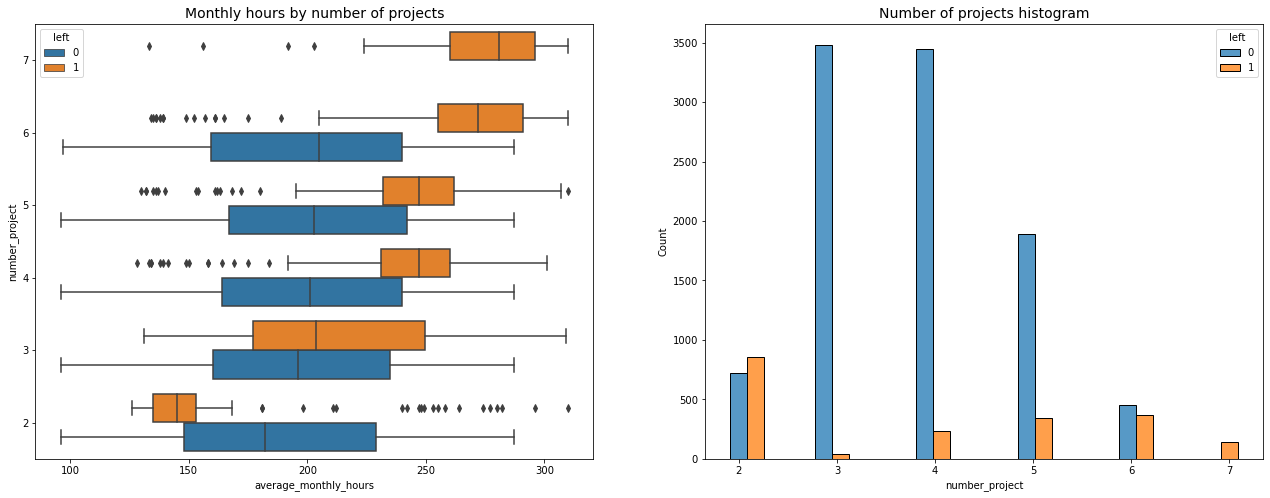

In [14]:
# Here I am creating a stacked boxplot showing average_monthly_hours distributions for number_projects
#comparing the distributions of employees that stayed to those who left.

## First, I set figure and axes
fig, ax = plt.subplots(1,2,figsize=(22,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

## Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')
plt.show()

In [15]:
# It seems that most workers are overworked. I want to check value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

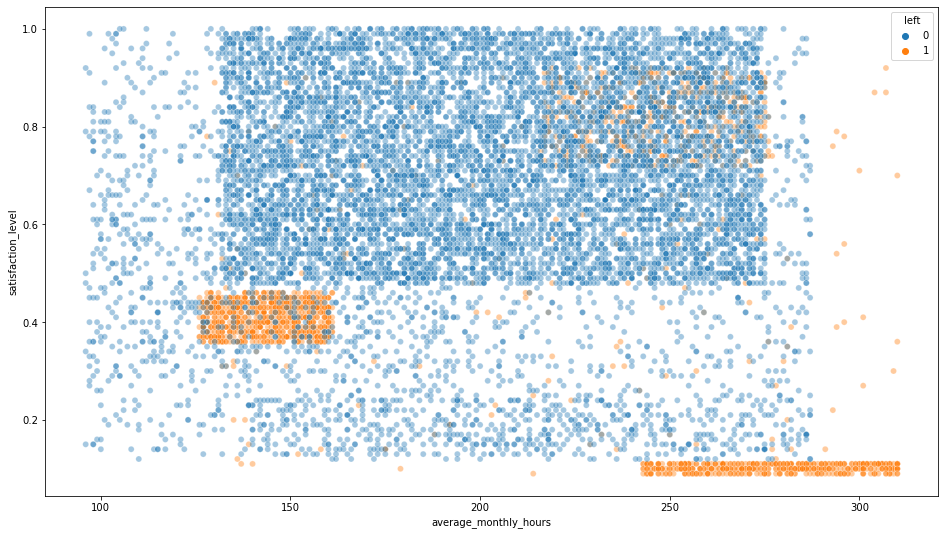

In [16]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16,9))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=df1, hue='left', alpha=0.4)
plt.show()


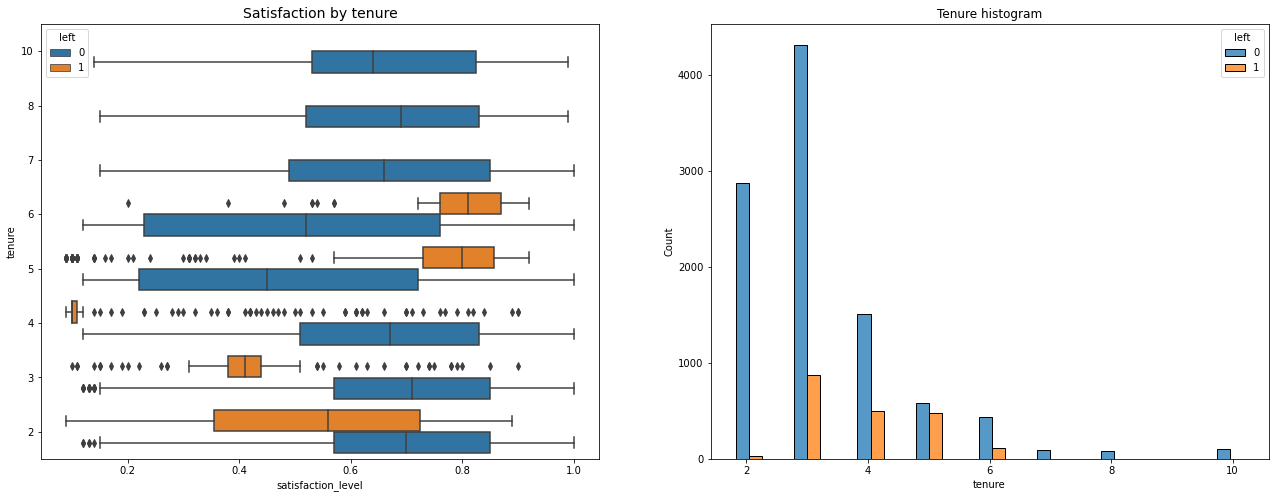

In [17]:
# Create a plot as needed
fig,ax = plt.subplots(1,2,figsize=(22,8))
# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus 
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')
# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1,x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram')
plt.show()


In [18]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


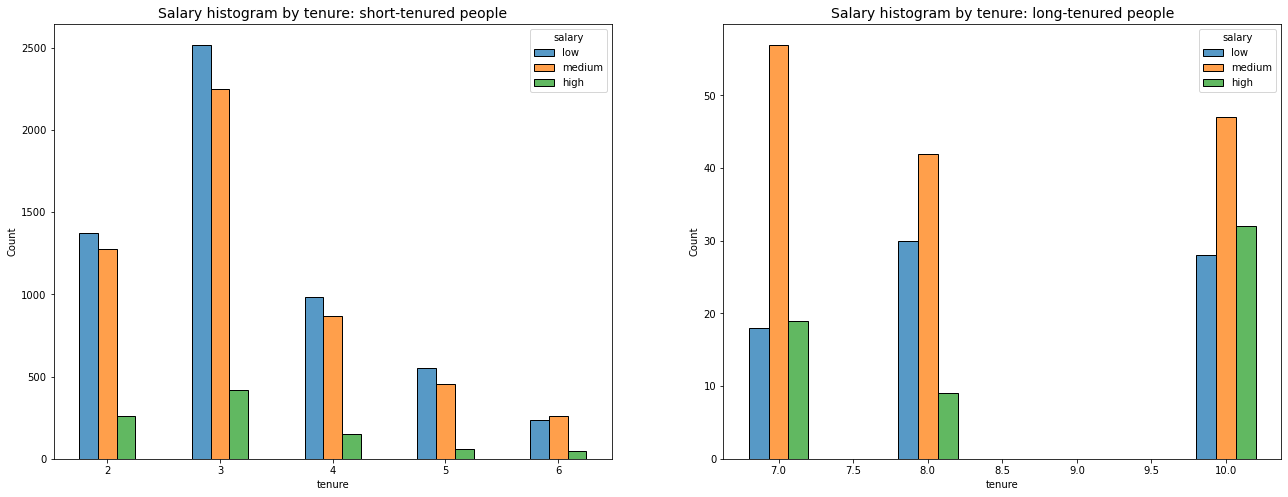

In [19]:
# Set figure and axes
fig,ax = plt.subplots(1,2,figsize=(22,8))
# Define short-tenured and lond-tenured employees
tenure_short = df1[df1['tenure']<7]
tenure_long = df1[df1['tenure']>6]
# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low','medium','high'],multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')
# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low','medium','high'], multiple='dodge',shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)
plt.show()



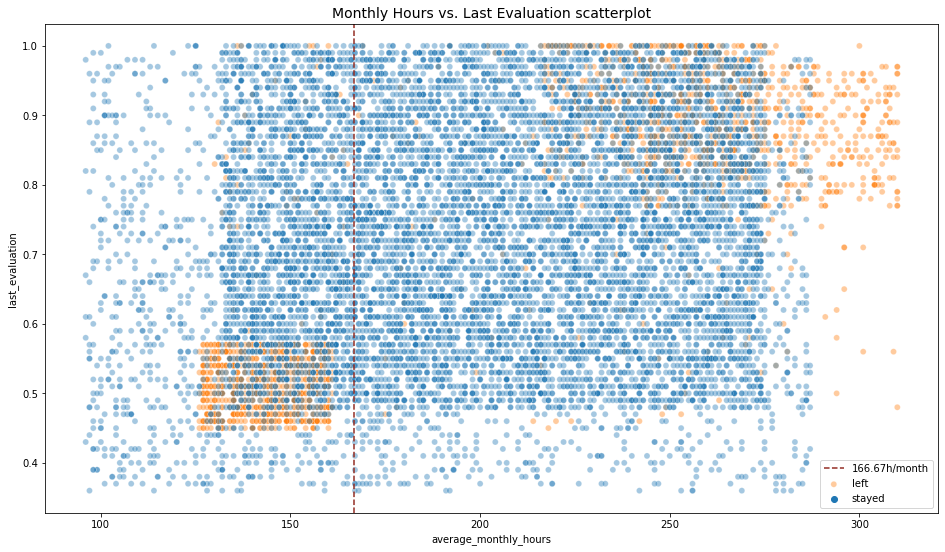

In [20]:
# Create a plot as needed
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#922B21', label='166.67h/month', ls='--', )
plt.legend(labels=['166.67h/month','left','stayed'])
plt.title('Monthly Hours vs. Last Evaluation scatterplot', fontsize=14)
plt.show()



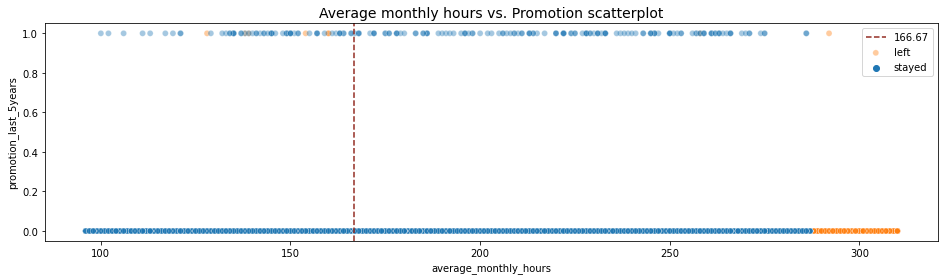

In [21]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16,4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#922B21', label='166.67h/month',ls='--')
plt.legend(labels=['166.67', 'left','stayed'])
plt.title('Average monthly hours vs. Promotion scatterplot', fontsize=14)
plt.show()


In [22]:
# Display counts for each department
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

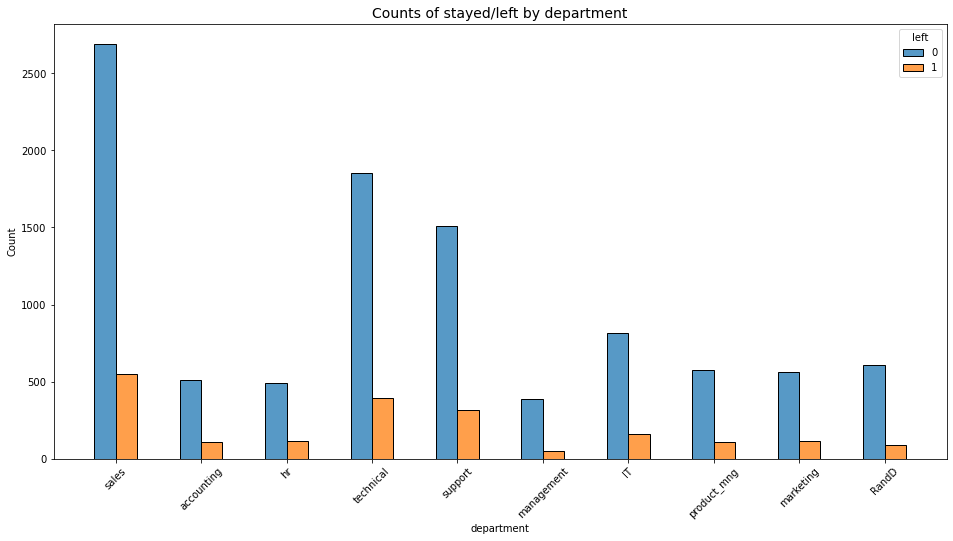

In [23]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(16,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14, color='black')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

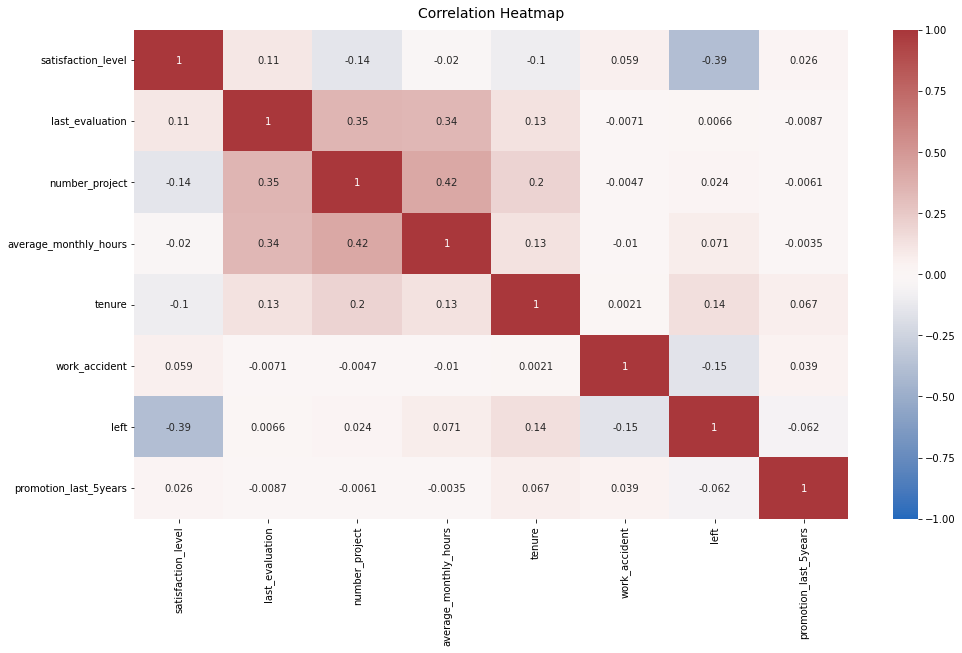

In [24]:
# Plot a correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin= -1, vmax= 1, annot=True, cmap=sns.color_palette("vlag",as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontsize=14, fontdict={'fontsize': 14}, pad=12)

### Insights

1. Most employees work more than average monthly hours. 
2. People that worked the most hours and had the most projects left.
3. Also, people that worked below average hours and had low satisfaction levels also left(most probably were fired)
4. A lot of people who tenured for 4,5,6 years and had low satisfaction levels also left.
5. Some people who worked for a long time for company still have low level of salary and were not promoted. Among them are a lot of those who left.

# Pace: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are trying to predict why employees leave. Our goal to decide whether an employee will leave or not, so it is a binomial type of task. 

### Identify the types of models most appropriate for this task.

Therefore, two types of models can be appropriate - Binomial logistic regression and tree based model. I want to build different models and compare how they perform. 

### Modeling

Add as many cells as you need to conduct the modeling process.

I would like to start with building binomial logistic regression model.

In [25]:
# Copy the dataframe
df_enc = df1.copy()
# Encode the `salary` column as an ordinal numeric category
df_enc["salary"] = (df_enc["salary"].astype("category").cat.set_categories(["low", "medium", "high"]).cat.codes)
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
df_enc["salary"].value_counts()

0    5740
1    5261
2     990
Name: salary, dtype: int64

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

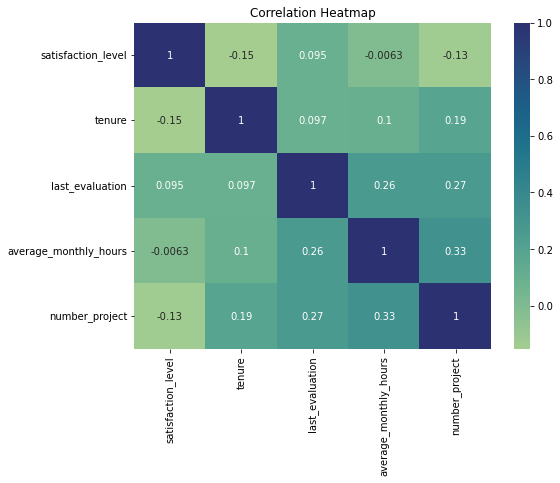

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[["satisfaction_level", "tenure", "last_evaluation","average_monthly_hours", "number_project" ]].corr(), annot=True, cmap="crest")
plt.title("Correlation Heatmap")
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

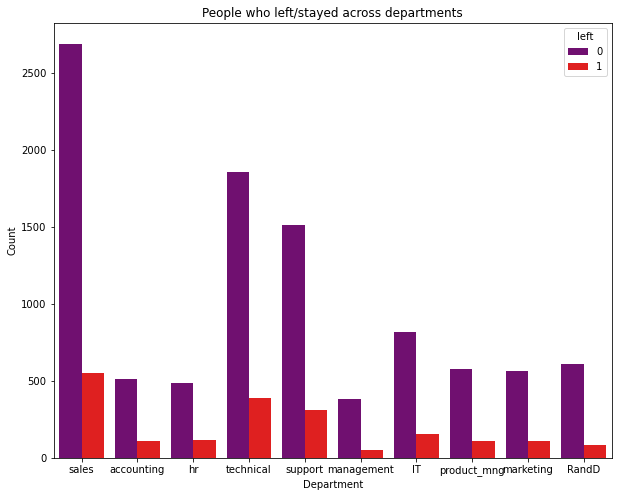

In [28]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
plt.figure(figsize=(10,8))
sns.countplot(x="department", hue="left", data=df1, palette={0:"purple", 1:"red"})
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("People who left/stayed across departments")
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [29]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg=df_enc[(df_enc["tenure"]>=lower_limit) & (df_enc["tenure"]<=upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Isolate the outcome variable
y = df_logreg["left"]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [31]:
# Select the features you want to use in your model
X = df_logreg.drop("left", axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
#Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [33]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state = 42, max_iter=500).fit(X_train, y_train)

In [34]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

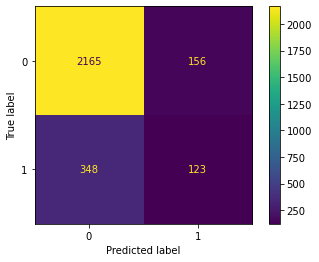

In [35]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test,y_pred, labels=log_clf.classes_)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
# Plot confusion matrix
log_disp.plot(values_format="")
plt.show()


True negatives: The number of people who did not leave that the model accurately predicted did not leave = 2165

False positives: The number of people who did not leave the model inaccurately predicted as leaving = 156

False negatives: The number of people who left that the model inaccurately predicted did not leave = 348

True positives: The number of people who left the model accurately predicted as leaving = 123

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [36]:
df_logreg["left"].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced.

In [37]:
# Create classification report for logistic regression model
target_names = ["Predicted to stay", "Predicted to leave"]
print(classification_report(y_test, y_pred, target_names=target_names))


                    precision    recall  f1-score   support

 Predicted to stay       0.86      0.93      0.90      2321
Predicted to leave       0.44      0.26      0.33       471

          accuracy                           0.82      2792
         macro avg       0.65      0.60      0.61      2792
      weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

Now I want to build tree-based model. 

In [38]:
#First I isolate outcome variable.
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [39]:
#Select the features
X = df_enc.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [41]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dicitionary of hyperparameters to search
cv_params = {'max_depth':[4,6,8,None],'min_samples_leaf':[2,5,1],'min_samples_split':[2,4,6]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


Fit the decision tree to the training data

In [42]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.83 s, sys: 0 ns, total: 2.83 s
Wall time: 2.83 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [43]:
#Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [44]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, I will write a function that will help me extract all the scores from the grid search.

In [45]:
def make_results(model_name:str, model_object, metric:str):
    
        # Create dictionary that maps input metric to actual metric name in GridSearchCV
        metric_dict = {'auc': 'mean_test_roc_auc','precision': 'mean_test_precision','recall': 'mean_test_recall','f1': 'mean_test_f1', 'accuracy': 'mean_test_accuracy'}      
        
        # Get all the results from the CV and out them in dataframe.
        cv_results = pd.DataFrame(model_object.cv_results_)
        
        # Isolate the row of the df with the max (metric) score.
        best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
        
        # Extract Accuracy, precision, recall, and f1 score from that row
        auc = best_estimator_results.mean_test_roc_auc
        f1 = best_estimator_results.mean_test_f1
        recall = best_estimator_results.mean_test_recall
        precision = best_estimator_results.mean_test_precision
        accuracy = best_estimator_results.mean_test_accuracy
        
        # Create table of results
        table = pd.DataFrame()
        table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
        return table
        
        

In [46]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model are strong indicators of good model performance.
Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. Therefore, I will construct a random forest model next.

In [47]:
#Instantiate the model
rf = RandomForestClassifier(random_state=0)

#Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3,5,None],
            'max_features':[1.0],
            'max_samples':[0.7, 1.0],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,3,4],
            'n_estimators':[300,500],
            }
#Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv=4, refit='roc_auc')

In [48]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 13s, sys: 0 ns, total: 9min 13s
Wall time: 9min 13s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

Define functions to pickle the model and read in the model.

In [50]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [51]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [52]:
write_pickle(path, rf1, 'hr_rf1')

In [53]:
rf1 = read_pickle(path, 'hr_rf1')

In [54]:
#Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [55]:
#Identify AUC score
rf1.best_score_

0.9804250949807172

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [56]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

In [57]:
'''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

'\n    Generate a table of test scores.\n\n    In: \n        model_name (string):  How you want your model to be named in the output table\n        model:                A fit GridSearchCV object\n        X_test_data:          numpy array of X_test data\n        y_test_data:          numpy array of y_test data\n\n    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model\n    '

In [58]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model':[model_name],
                         'precision':[precision],
                         'recall':[recall],
                         'accuracy':[accuracy],
                         'f1':[f1],
                         'AUC':[auc]})
    return table
    

In [59]:
rf1_test_scores = get_scores('Random Forest1 Test', rf1, X_test, y_test)
print(rf1_test_scores)

                 model  precision    recall  accuracy        f1       AUC
0  Random Forest1 Test   0.964211  0.919679  0.980987  0.941418  0.956439


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. 

There is a chance that there is some data leakage occurring. In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.
    The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.
    I could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. I could call this new feature 'overworked'. It will be a binary variable.

In [60]:
#Drop the satisfaction_level
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2["overworked"] = df2['average_monthly_hours']
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,262
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159


In [62]:
# Inspect max and min average monthly hours values
print(f'Max working hours: {df2["overworked"].max()}')
print(f'Min working hours: {df2["overworked"].min()}')

Max working hours: 310
Min working hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

I can define being overworked as working more than 175 hours per month on average.

To make the overworked column binary, I will reassign the column using a boolean mask.

In [63]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] >= 175).astype(int)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
#Drop the average_monthly_hours column.
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [65]:
#Isolate outcome variable
y = df2['left']
#Select the features
X = df2.drop('left', axis = 1)

In [66]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [67]:
# Instantiate the model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters
cv_params = {'max_depth':[4, 6, 8, None],
          'min_samples_leaf':[2, 5, 1],
         'min_samples_split':[2, 4, 6],
         }
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv=4, refit='roc_auc')

In [68]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.25 s, sys: 0 ns, total: 2.25 s
Wall time: 2.25 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [69]:
#Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [70]:
#Check best AUC score
tree2.best_score_

0.9581761274629277

This model performs very well, even without satisfaction levels and detailed hours worked data.

Next, check the other scores.

In [71]:
#Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv    0.85868  0.900202  0.878629  0.958634  0.958176


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

In [72]:
# Instantiate model for random forest 2
rf = RandomForestClassifier(random_state=0)

#Instantiate a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3,5,None],
            'max_features':[1.0],
            'max_samples':[0.7, 1.0],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,3,4],
            'n_estimators':[300, 500],
            }

#Assign a dictionary of scoring
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate GridSearch
rf2=GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [73]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 6min 55s, sys: 0 ns, total: 6min 55s
Wall time: 6min 55s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [74]:
write_pickle(path,rf2, 'hr2_rf2')

In [75]:
rf2 = read_pickle(path, 'hr2_rf2')

In [76]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [77]:
rf2.best_score_

0.9647377676783606

In [78]:
#Get all cv scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv    0.85868  0.900202  0.878629  0.958634  0.958176
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv    0.86557  0.873392  0.869196  0.956411  0.964738


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.

In [79]:
#Get prediction on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,accuracy,f1,AUC
0,random forest2 test,0.869903,0.899598,0.960974,0.884501,0.936399


This seems to be a stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

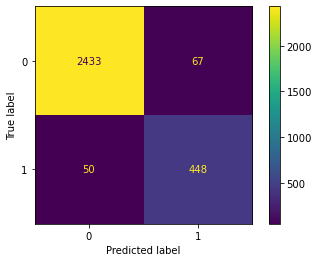

In [81]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)

disp.plot(values_format='')

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, I want to inspect the splits of the decision tree model and the most important features in the random forest model.

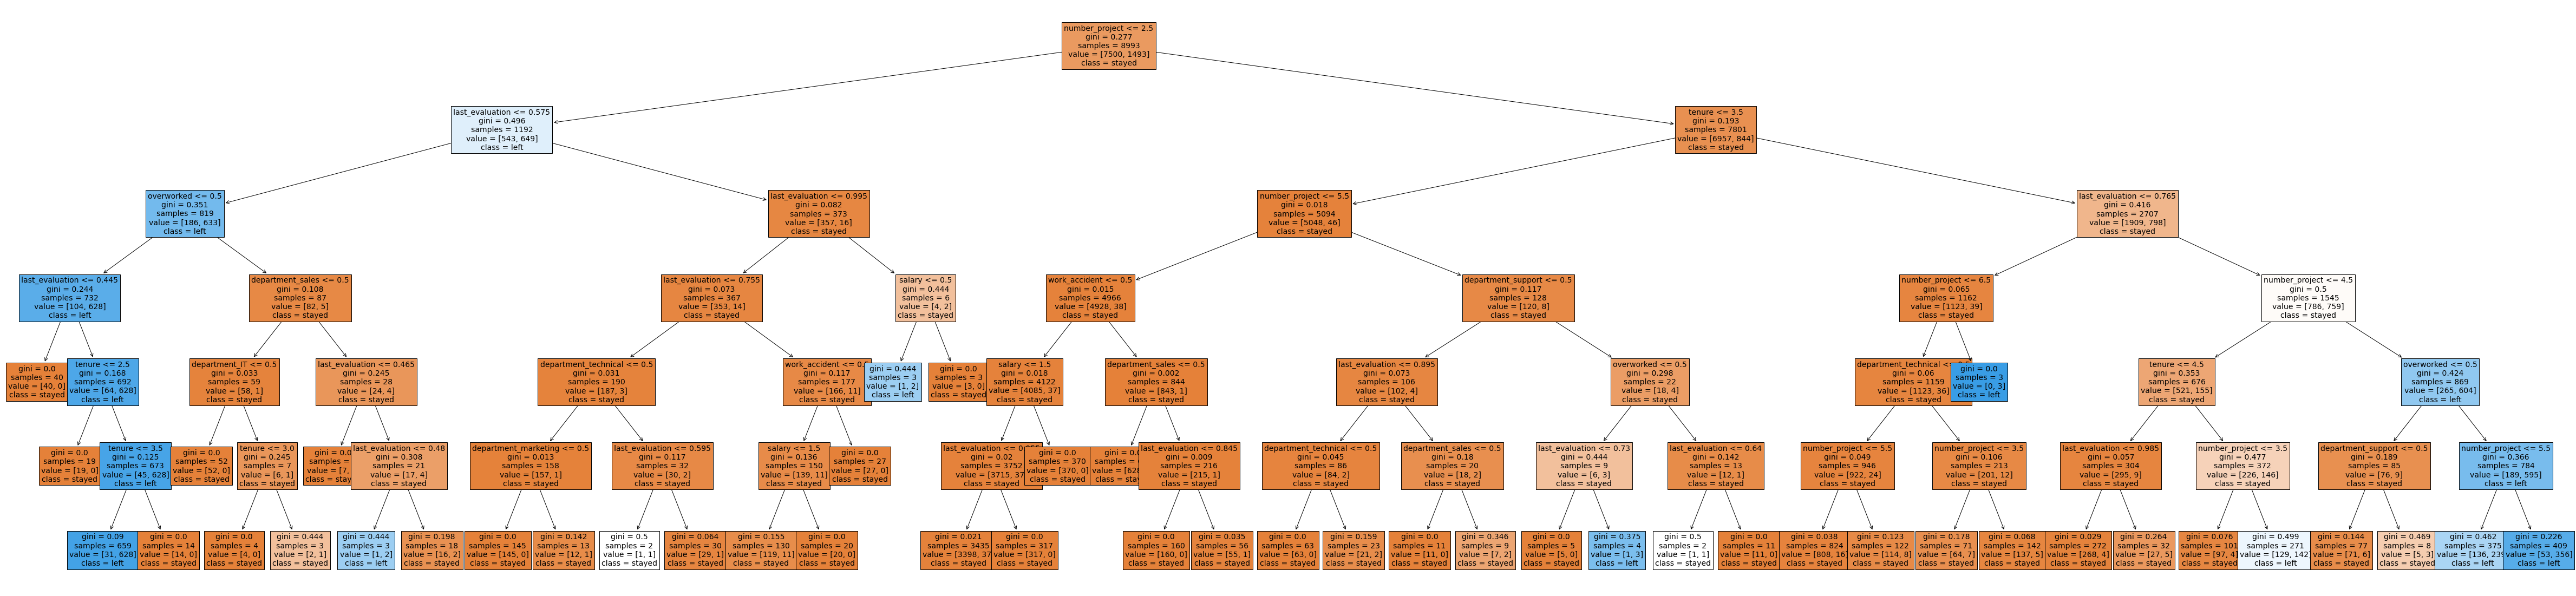

In [82]:
#Plot the decision tree
plt.figure(figsize=(85, 20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, class_names={0:'stayed',1:'left'}, filled=True)
plt.show()

I can also get feature importance from decision trees 

In [86]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,columns=['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)
#Only extract features with importance > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.344552
number_project,0.344153
tenure,0.216053
overworked,0.091775
department_support,0.001127
salary,0.000912
department_sales,0.000608
department_technical,0.000419
work_accident,0.000183
department_IT,0.000139


I also create a barplot to visualise the decision tree features importances.

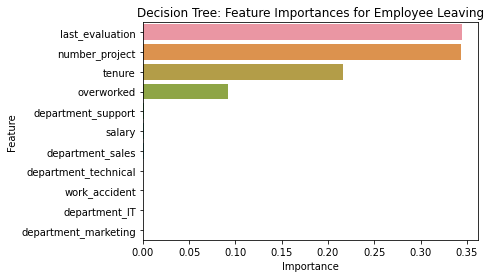

In [87]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

Now, I plot the feature importances for the random forest model.

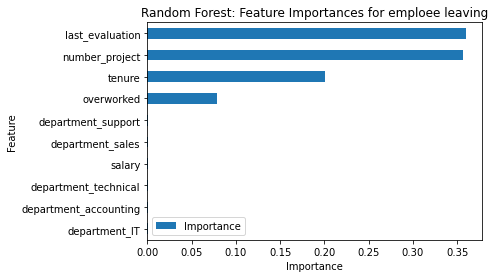

In [88]:
#Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

#Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

#Get columns labels of top 10 features
feat = X.columns[ind]

## Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature": feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")

fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', ax = ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest: Feature Importances for emploee leaving")
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

### Conclusion, Recommendations, Next Steps

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, I could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.